## Sales Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl

In [6]:
df = pd.read_excel('D:\\Power BI\\Sales-Analysis-main\\Sales-Analysis-main\\superstore_sales.xlsx')

In [7]:
df.shape

(51290, 21)

In [8]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [11]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [12]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


In [16]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [15]:
df.loc[df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


# 1.	Which are the most selling products?

In [27]:
Most_Selling_Products = df.groupby('product_name').agg({'quantity' : 'sum'}).sort_values('quantity', ascending=False).head(10)
Most_Selling_Products

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


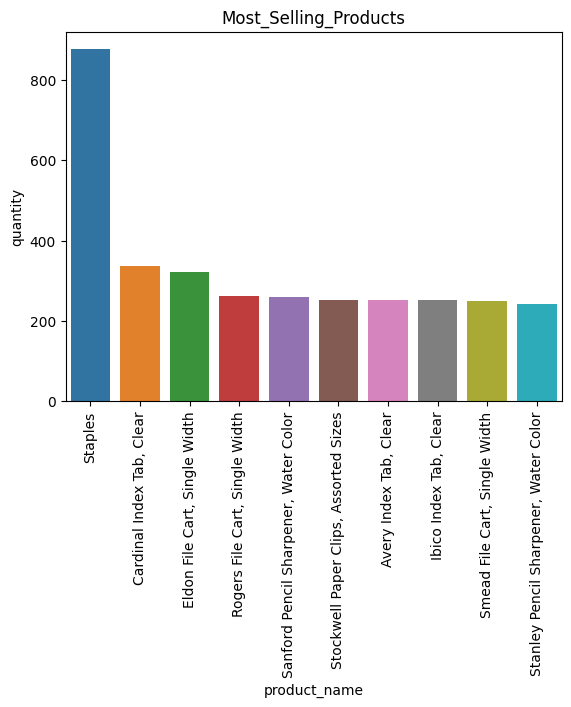

In [47]:
sns.barplot(x='product_name',y='quantity',data=Most_Selling_Products.reset_index())
plt.title('Most_Selling_Products')
plt.xticks(rotation = 'vertical')
plt.show()

# 2.Which are the Top 10 products by sales?

In [30]:
Top_10_Products_By_Sales = df.groupby('product_name').agg({'sales' : 'sum'}).sort_values('sales',ascending=False).head(10)
Top_10_Products_By_Sales

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


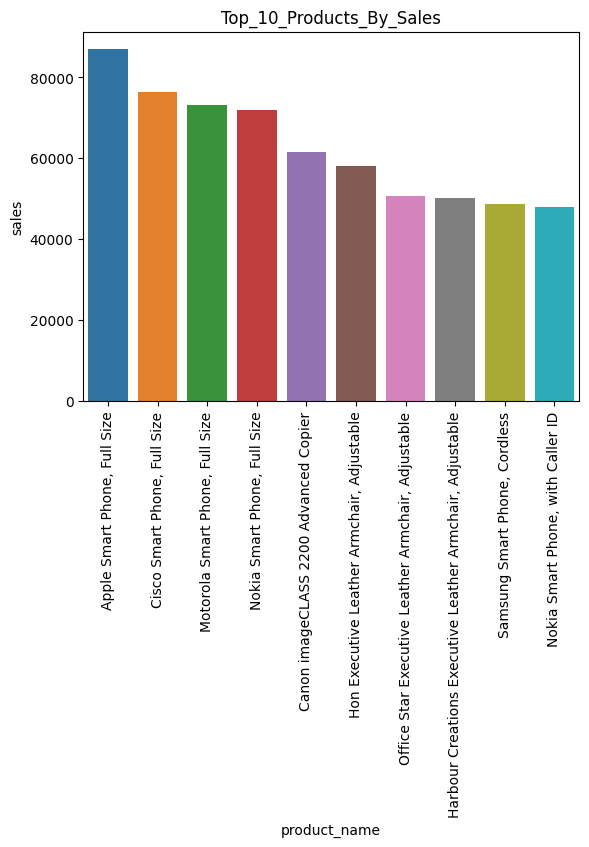

In [50]:
sns.barplot(x='product_name',y='sales',data=Top_10_Products_By_Sales.reset_index())
plt.xticks(rotation = 'vertical')
plt.title('Top_10_Products_By_Sales')
plt.show()

# 3.	Which are the most profitable products?

In [52]:
Most_Profitable_Product = df.groupby('product_name').agg({'profit' : 'sum'}).sort_values('profit',ascending=False).head(10)
Most_Profitable_Product

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


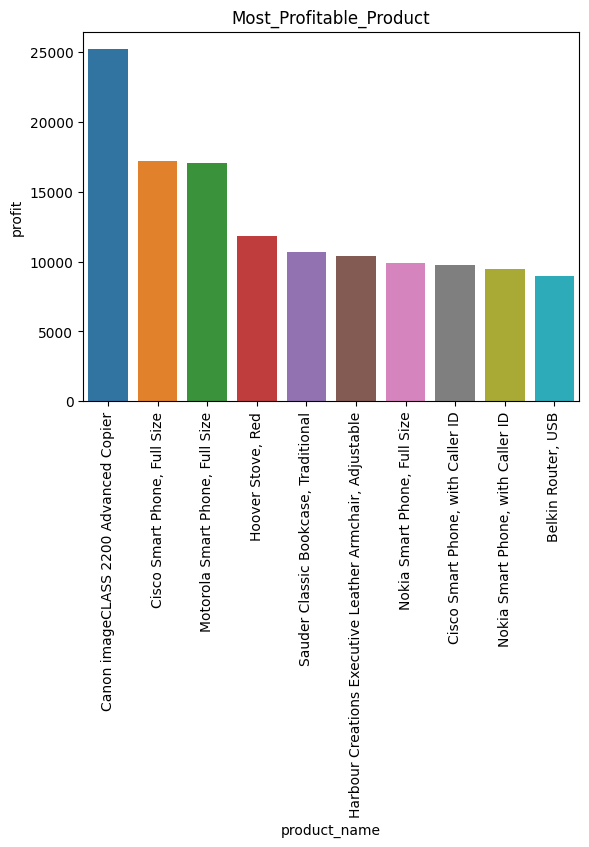

In [54]:
sns.barplot(x='product_name',y='profit',data=Most_Profitable_Product.reset_index())
plt.xticks(rotation = 'vertical')
plt.title('Most_Profitable_Product')
plt.show()

# 4.What category sold the most?

In [62]:
Category_Sold_Most = df.groupby('category').agg({'sales':'sum'}).sort_values('sales',ascending=False)
Category_Sold_Most

,sales
category,
Technology,4.744557e+06
Furniture,4.110874e+06
Office Supplies,3.787070e+06


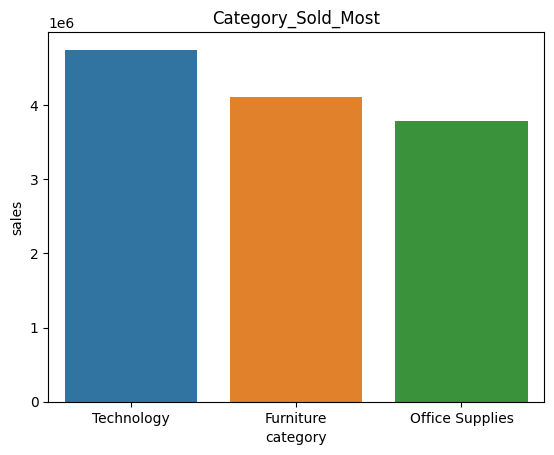

In [66]:
sns.barplot(x='category',y='sales',data=Category_Sold_Most.reset_index())
plt.title('Category_Sold_Most')
plt.show()

# 5.Which are the most profitable category?

In [67]:
Most_Profitable_category = df.groupby('category').agg({'profit':'sum'}).sort_values('profit',ascending=False)
Most_Profitable_category

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


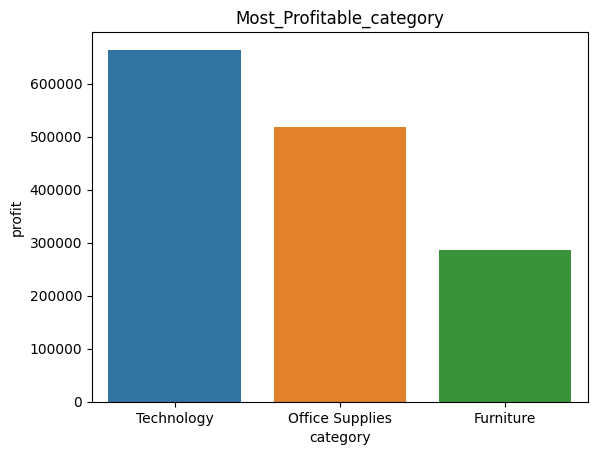

In [75]:
sns.barplot(x='category',y='profit',data=Most_Profitable_category.reset_index())
plt.title('Most_Profitable_category')
plt.show()

# 6.Total sales values by category and subcategory

In [77]:
Total_sales_by_category_and_Subcategory = df.groupby(['category','sub_category']).agg({'sales':'sum'})
Total_sales_by_category_and_Subcategory

sales
category        sub_category              
Furniture       Bookcases     1.466572e+06
                Chairs        1.501682e+06
                Furnishings   3.855783e+05
                Tables        7.570419e+05
Office Supplies Appliances    1.011064e+06
                Art           3.720920e+05
                Binders       4.619115e+05
                Envelopes     1.709043e+05
                Fasteners     8.324232e+04
                Labels        7.340403e+04
                Paper         2.442917e+05
                Storage       1.127086e+06
                Supplies      2.430742e+05
Technology      Accessories   7.492370e+05
                Copiers       1.509436e+06
                Machines      7.790601e+05
                Phones        1.706824e+06

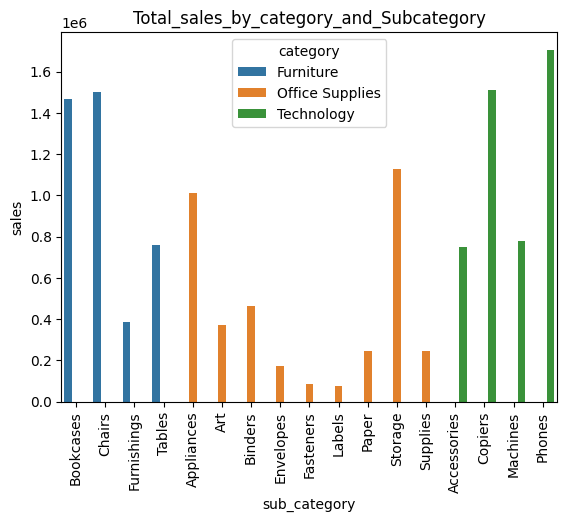

In [107]:
sns.barplot(x='sub_category',y='sales',data=Total_sales_by_category_and_Subcategory.reset_index(),hue='category')
plt.xticks(rotation = 'vertical')
plt.title('Total_sales_by_category_and_Subcategory')
plt.show()

# 7.Which are the most selling products in subcategory?

In [104]:
Most_Selling_Product_in_SubCategory = df.groupby(['category','sub_category']).agg({'quantity':'count'}).sort_values('quantity',ascending=False)
Most_Selling_Product_in_SubCategory

quantity
category        sub_category          
Office Supplies Binders           6152
                Storage           5059
                Art               4883
                Paper             3538
Furniture       Chairs            3434
Technology      Phones            3357
Furniture       Furnishings       3170
Technology      Accessories       3075
Office Supplies Labels            2606
                Envelopes         2435
                Supplies          2425
                Fasteners         2420
Furniture       Bookcases         2411
Technology      Copiers           2223
Office Supplies Appliances        1755
Technology      Machines          1486
Furniture       Tables             861

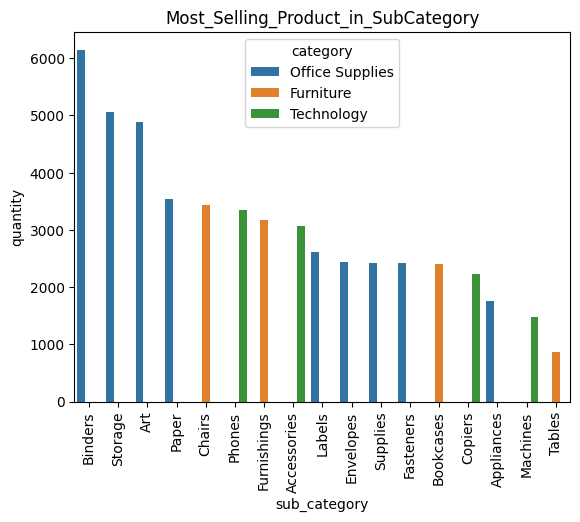

In [106]:
sns.barplot(x='sub_category',y='quantity',data=Most_Selling_Product_in_SubCategory.reset_index(),hue='category')
plt.xticks(rotation='vertical')
plt.title('Most_Selling_Product_in_SubCategory')
plt.show()

# 8.Which customer segments are the most profitable ?

In [110]:
Most_Profitble_Customer_Segment = df.groupby('segment').agg({'profit':'sum'}).sort_values('profit',ascending=False)
Most_Profitble_Customer_Segment

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


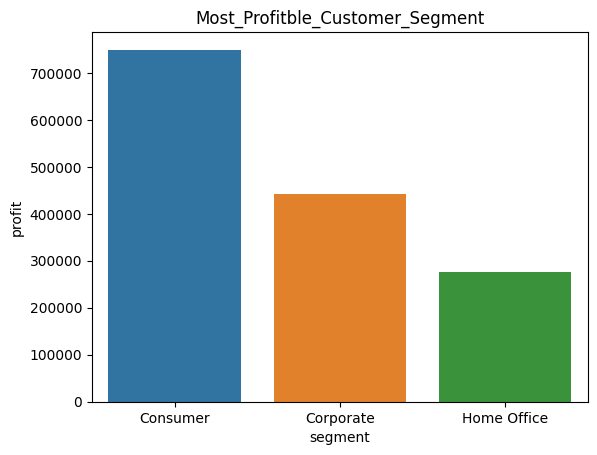

In [113]:
sns.barplot(x='segment',y='profit',data=Most_Profitble_Customer_Segment.reset_index())
plt.title('Most_Profitble_Customer_Segment')
plt.show()

# 9.What shipping modes sold the most products based on sales?

In [148]:
Shipping_Modes_Sold_Most_Products_Based_On_Sales = df.groupby('ship_mode').agg({'sales':'sum'}).sort_values('sales',ascending=False)
Shipping_Modes_Sold_Most_Products_Based_On_Sales

,sales
ship_mode,
Standard Class,7.578652e+06
Second Class,2.565672e+06
First Class,1.830976e+06
Same Day,6.672020e+05


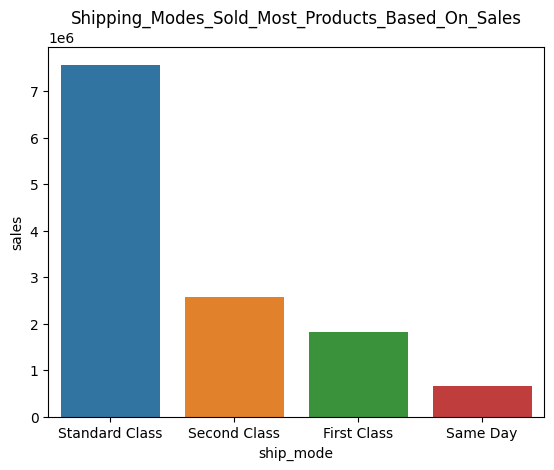

In [136]:
sns.barplot(x='ship_mode',y='sales',data=Shipping_Modes_Sold_Most_Products_On_Sales.reset_index())
plt.title('Shipping_Modes_Sold_Most_Products_Based_On_Sales')
plt.show()

# 10.Visualize the Category column from the Shipmode column dataset standpoints?

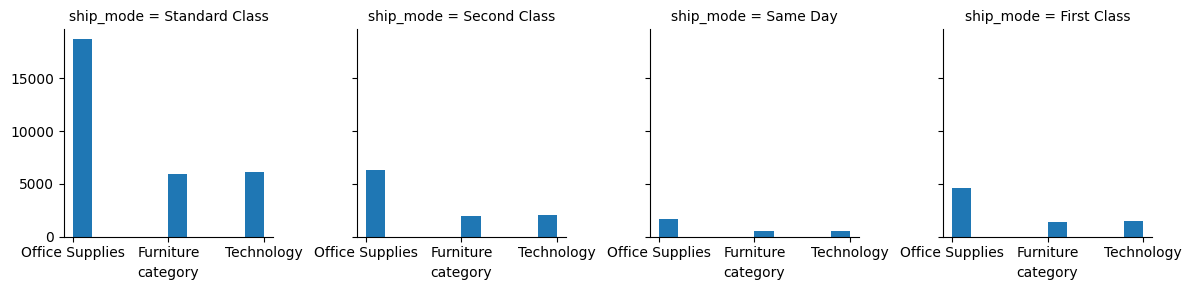

In [143]:
a =sns.FacetGrid(df,col='ship_mode',palette='rainbow').map(plt.hist,'category')

# 11.What market sold the most products?

In [146]:
Market_Sold_Most_Products = df.groupby('market').agg({'quantity':'count'}).sort_values('quantity',ascending=False)
Market_Sold_Most_Products

,quantity
market,
APAC,11002
LATAM,10294
EU,10000
US,9994
EMEA,5029
Africa,4587
Canada,384


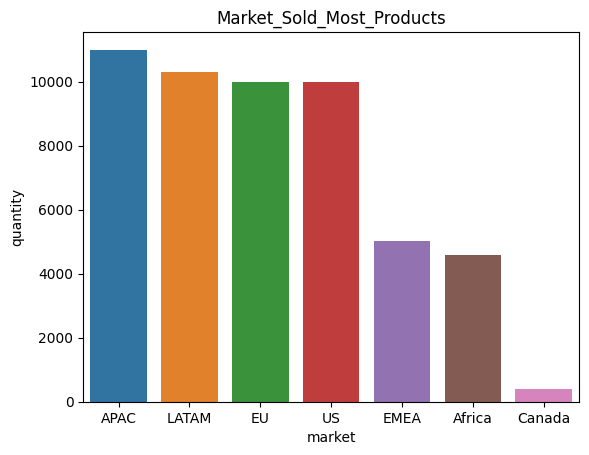

In [155]:
sns.barplot(x='market',y='quantity',data=Market_Sold_Most_Products.reset_index())
plt.title('Market_Sold_Most_Products')
plt.show()

# 12.Which are the Top 10 country by sales?

In [156]:
Top_10_Country_By_Sales = df.groupby('country').agg({'sales':'sum'}).sort_values('sales',ascending=False).head(10)
Top_10_Country_By_Sales

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


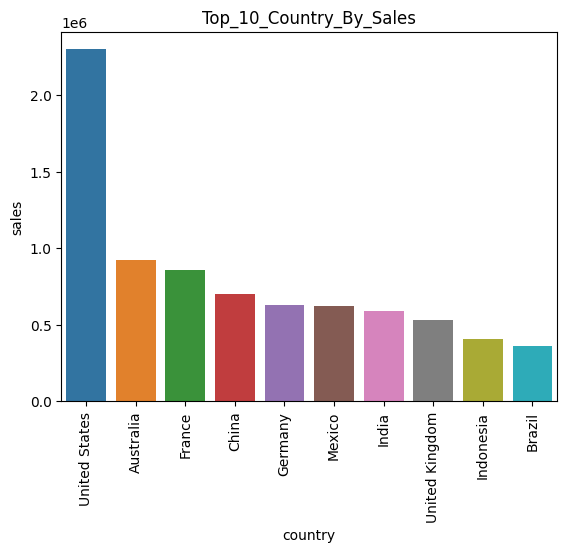

In [158]:
sns.barplot(x='country',y='sales',data=Top_10_Country_By_Sales.reset_index())
plt.xticks(rotation='vertical')
plt.title('Top_10_Country_By_Sales')
plt.show()

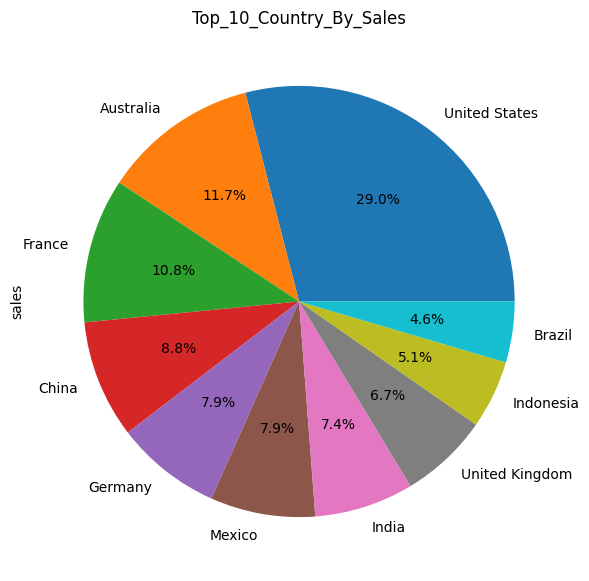

In [164]:
Top_10_Country_By_Sales['sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('Top_10_Country_By_Sales')
plt.show()

# 14.Which are the average shipping cost for top 10 different countries?

In [161]:
Average_Shipping_Cost_For_Top_10_Countries = df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost',ascending=False).head(10)
Average_Shipping_Cost_For_Top_10_Countries

,shipping_cost
country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


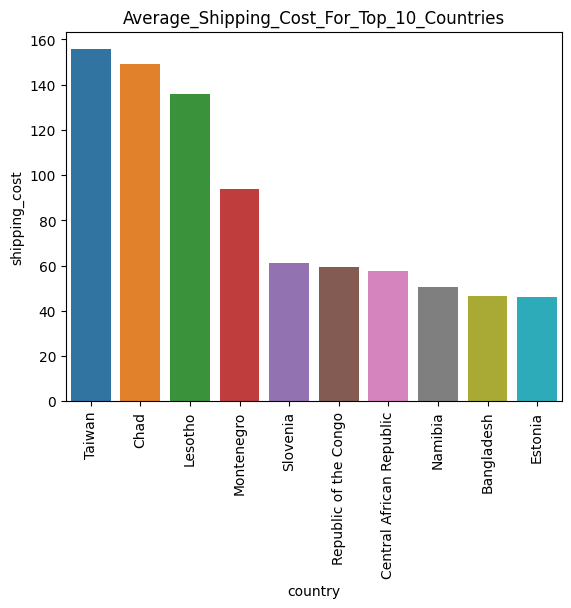

In [200]:
sns.barplot(x='country',y='shipping_cost',data=Average_Shipping_Cost_For_Top_10_Countries.reset_index())
plt.xticks(rotation='vertical')
plt.title('Average_Shipping_Cost_For_Top_10_Countries')
plt.show()

# 15.Who are the top-10 most profitable customers?

In [189]:
Top_10_Most_Profitable_Customers = df.sort_values('profit',ascending=False).head(10)['customer_name']
Top_10_Most_Profitable_Customers

29530            Tamara Chand
36239            Raymond Buch
48097            Hunter Lopez
33011           Adrian Barton
5522             Sanjit Chand
43831           Patrick Jones
46525            Tom Ashbrook
10265    Christopher Martinez
548               Carol Adams
24420         Cynthia Arntzen
Name: customer_name, dtype: object